----
#**Project 3: Airbnb**

----

1. Calculate How many properties in each neighbourhood group

2. Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups

3. Which Neighbourhood group has lowest prices use bar chart to show this for all neighbourhood groups

4. Highest and lowest price airbnb in each Neighbour Hood Group

5. Which Host has highest count of properties

6. Which neighbourhood is most expensive and cheapest top 10 barchart

7. Count different type of room_type and do a pie chart showing % of each room type in overall dataset

8. scatter plot between longitutude and latitude for different neighbourhood groups

9. scatter plot between longitutude and latitude for different room_types

----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/content/AB_NYC_2019.csv'
df_raw = pd.read_csv(path)

In [ ]:
df_raw.head(7)

In [ ]:
df_raw.tail(7)

In [5]:
df_raw.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df_raw.shape

(48895, 16)

----
#**Data PreProcessing**

----

The columns 'name', 'host_name', 'last_review' & 'reviews_per_month' have null values.

Since, the 'name' of the busines and 'host_name' would not be much relevant for machine learning analysis anyways, we don't delete them.

We will use the appoach of changing these null values with a string 'Unnamed Business' & 'Unnamed Host'

We can use SimpleImputer method from sklearn library for this implementation.

In [8]:
from sklearn.impute import SimpleImputer

imputerName = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unnamed Business')
imputerHostName = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unnamed Host')

# Fit and transform the 'name' column
df_raw['name'] = imputerName.fit_transform(df_raw[['name']])

df_raw['host_name'] = imputerHostName.fit_transform(df_raw[['host_name']])

To address the issue of missing values in the 'last_review' column, given their substantial occurrence, we have chosen not to remove these rows from the dataset. Instead, we will substitute the absent dates with a predefined default date, '1999-12-31'. This approach enables us to retain the dataset's completeness while also providing a clear indication of the absence of recorded review dates. Additionally, it simplifies the process of identifying rows with missing values for future reference.

Furthermore, in the case of the 'reviews_per_month' column, missing values signify the absence of reviews up to that point. Therefore, we will replace these null values with zeros, signifying that there have been no reviews recorded for those instances.

In [10]:
from sklearn.impute import SimpleImputer

imputerLastReview = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = '1999-12-31')
imputerReviewsPerMonth = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)

df_raw['last_review'] = imputerLastReview.fit_transform(df_raw[['last_review']])
df_raw['reviews_per_month'] = imputerReviewsPerMonth.fit_transform(df_raw[['reviews_per_month']])

To enhance data clarity, we will convert the data type of the 'last_review' column from string object to datetime.

In [ ]:
df_raw.loc[: , 'last_review'] = pd.to_datetime(df_raw['last_review'])

In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

The DataFrame 'df' has been cleaned and will be used for subsequent data analysis.

In [13]:
df = df_raw

----

TASK 1: Calculate How many properties in each neighbourhood group

----

In [14]:
df.groupby(['neighbourhood_group'])['id'].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: id, dtype: int64

----
TASK2: Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups

----

----

TASK3: Which Neighbourhood group has lowest prices use bar chart to show this for all neighbourhood groups.

----

In [15]:
df_task2 = df[['id','neighbourhood_group','price']]
priceByGroup = df_task2.groupby(['neighbourhood_group'])['price'].mean()

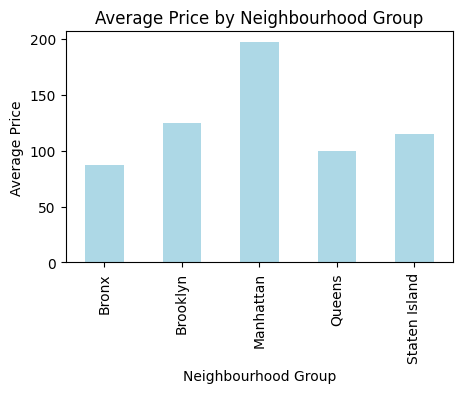

In [16]:
fig = plt.figure(figsize=(5, 3))

priceByGroup.plot(kind='bar', color='lightblue')

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title("Average Price by Neighbourhood Group")

plt.show()


The bar chart  illustrates that Manhattan has the highest average price among all the neighborhood groups while Bronx has the lowest average price.

----
TASK4: Highest and lowest price airbnb in each Neighbour Hood Group

----

In [17]:
df_task4 = df_task2

In [18]:
df_task4.sort_values(['price'], ascending = True, inplace = True)
lowest = df_task4.drop_duplicates(subset = ['neighbourhood_group'], keep = 'first')
highest = df_task4.drop_duplicates(subset = ['neighbourhood_group'], keep = 'last')

<ipython-input-18-9bf6bcd1712b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task4.sort_values(['price'], ascending = True, inplace = True)


In [19]:
print("Lowest : \n",lowest)
print()
print("Highest: \n",highest)

Lowest : 
              id neighbourhood_group  price
25796  20639914            Brooklyn      0
25433  20333471               Bronx      0
26259  20933849           Manhattan      0
22835  18490141              Queens     10
45646  34870577       Staten Island     13

Highest: 
              id neighbourhood_group  price
24477  19698169               Bronx   2500
22353  18051877       Staten Island   5000
17692  13894339            Brooklyn  10000
9151    7003697              Queens  10000
29238  22436899           Manhattan  10000


----
TASK5: Which Host has highest count of properties

----

In [20]:
df_task5 = df[['host_id', 'host_name', 'calculated_host_listings_count']]

In [21]:
df_task5.sort_values(['calculated_host_listings_count'], ascending = False, inplace = True)

<ipython-input-21-ef7a30211142>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task5.sort_values(['calculated_host_listings_count'], ascending = False, inplace = True)


In [22]:
print("The host with the highest count of properties:\n")
df_task5.iloc[0]

The host with the highest count of properties:



host_id                              219517861
host_name                         Sonder (NYC)
calculated_host_listings_count             327
Name: 39773, dtype: object

----
TASK6: Which neighbourhood is most expensive and cheapest top 10 barchart

----

In [23]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [24]:
df_task6 = df[['id','neighbourhood','price']]

In [25]:
average_per_neighbourhood = df_task6.groupby(['neighbourhood'])['price'].mean()
sorted = average_per_neighbourhood.sort_values(ascending = False)
top_ten = sorted.head(10)
print(top_ten)

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64


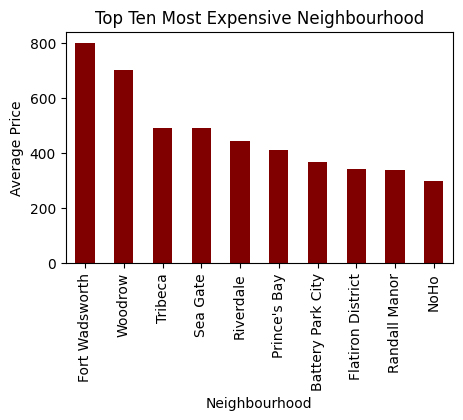

In [26]:
fig = plt.figure(figsize=(5, 3))

top_ten.plot(kind = 'bar', color = 'maroon')

plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title("Top Ten Most Expensive Neighbourhood")


plt.show()

----
TASK7. Count different type of room_type and do a pie chart showing % of each room type in overall dataset


----

In [27]:
df_task7 = df[['room_type']]

In [28]:
room_type_counts = df_task7.value_counts().reset_index(name = 'count')

In [29]:
room_type_counts['percentage'] = (room_type_counts['count'] / room_type_counts['count'].sum()) * 100

In [30]:
room_type_counts

,room_type,count,percentage
0,Entire home/apt,25409,51.966459
1,Private room,22326,45.661111
2,Shared room,1160,2.372431


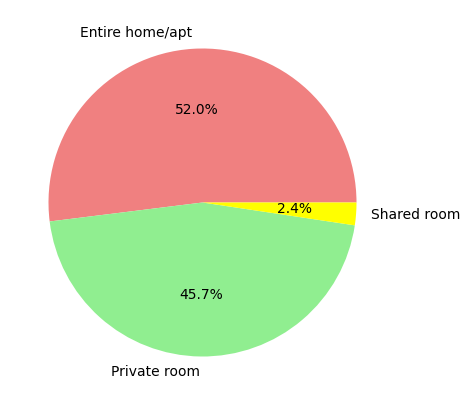

In [31]:
fig = plt.figure(figsize=(6, 5))

colors = ['lightcoral', 'lightgreen', 'yellow']

plt.pie(room_type_counts['percentage'], labels=room_type_counts['room_type'], colors=colors, autopct='%1.1f%%')

plt.show()


----

TASK 8. Scatter plot between longitutude and latitude for different neighbourhood groups


----

In [32]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [33]:
df_task8 = df[['neighbourhood_group','latitude', 'longitude']]

In [34]:
df_task8

,neighbourhood_group,latitude,longitude
0,Brooklyn,40.64749,-73.97237
1,Manhattan,40.75362,-73.98377
2,Manhattan,40.80902,-73.94190
3,Brooklyn,40.68514,-73.95976
4,Manhattan,40.79851,-73.94399
...,...,...,...
48890,Brooklyn,40.67853,-73.94995
48891,Brooklyn,40.70184,-73.93317
48892,Manhattan,40.81475,-73.94867
48893,Manhattan,40.75751,-73.99112


In [35]:
df_tasks = df_task8
df_tasks.isna().sum()

neighbourhood_group    0
latitude               0
longitude              0
dtype: int64

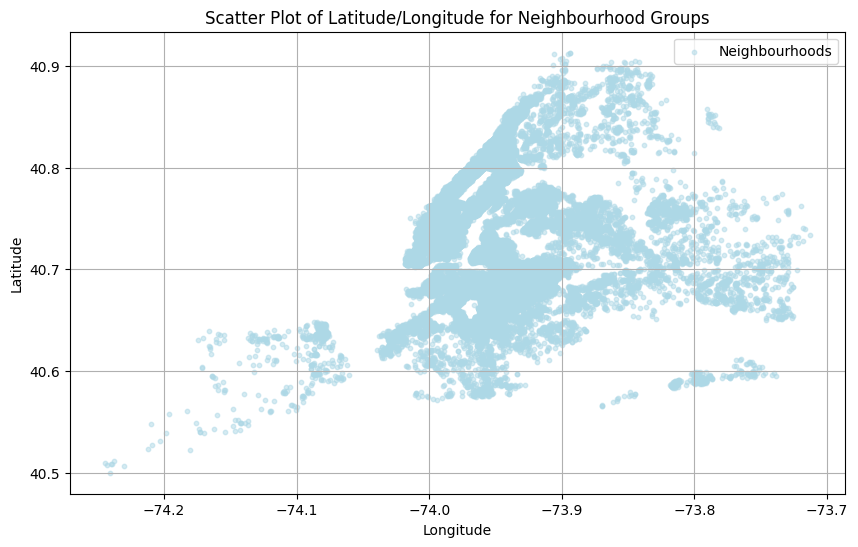

In [36]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a scatter plot
plt.scatter(df_task8['longitude'], df_task8['latitude'], s=10, alpha=0.5, c='lightblue', label='Neighbourhoods')

# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude/Longitude for Neighbourhood Groups')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


----

TASK 9. scatter plot between longitutude and latitude for different room_types



----

In [37]:
df_task9 = df[['room_type','latitude', 'longitude']]

In [38]:
df_task9

,room_type,latitude,longitude
0,Private room,40.64749,-73.97237
1,Entire home/apt,40.75362,-73.98377
2,Private room,40.80902,-73.94190
3,Entire home/apt,40.68514,-73.95976
4,Entire home/apt,40.79851,-73.94399
...,...,...,...
48890,Private room,40.67853,-73.94995
48891,Private room,40.70184,-73.93317
48892,Entire home/apt,40.81475,-73.94867
48893,Shared room,40.75751,-73.99112


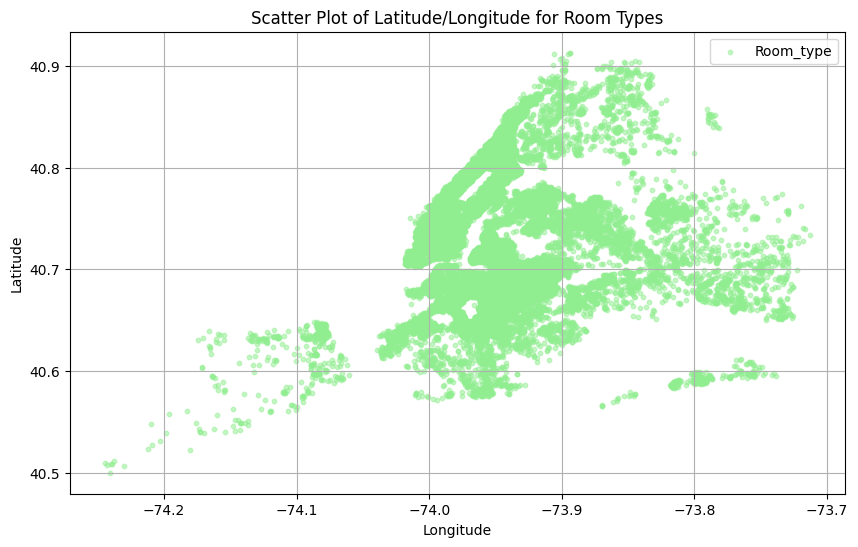

In [39]:
plt.figure(figsize=(10, 6))

plt.scatter(df_task8['longitude'], df_task8['latitude'], s=10, alpha=0.5, c='lightgreen', label='Room_type')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude/Longitude for Room Types')
plt.legend()
plt.grid(True)

plt.show()
